### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [4]:
# Creamos una lista con los DataFrames y les asignamos un nombre para identificarlas
todas_las_tiendas = [tienda, tienda2, tienda3, tienda4]

# También creamos una lista de nombres para que los reportes se vean claros
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

#1. Análisis de facturación



In [17]:
for i, df in enumerate(todas_las_tiendas):
    facturacion = df['Precio'].sum()
    print(f"Facturación total de {nombres[i]}: ${facturacion:,.2f}")

Facturación total de Tienda 1: $1,150,880,400.00
Facturación total de Tienda 2: $1,116,343,500.00
Facturación total de Tienda 3: $1,098,019,600.00
Facturación total de Tienda 4: $1,038,375,700.00


# 2. Ventas por categoría

In [6]:
for i, df in enumerate(todas_las_tiendas):
    print(f"\nCategorías populares en {nombres[i]}:")
    print(df['Categoría del Producto'].value_counts().head(3))


Categorías populares en Tienda 1:
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

Categorías populares en Tienda 2:
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

Categorías populares en Tienda 3:
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

Categorías populares en Tienda 4:
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


# 3. Calificación promedio de la tienda


In [7]:
for i, df in enumerate(todas_las_tiendas):
    promedio = df['Calificación'].mean()
    print(f"{nombres[i]} - Calificación promedio: {promedio:.2f}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.00


# 4. Productos más y menos vendidos

In [8]:
for i, df in enumerate(todas_las_tiendas):
    conteo = df['Producto'].value_counts()
    print(f"\n{nombres[i]}:")
    print(f"  - Más vendido: {conteo.idxmax()} ({conteo.max()} unidades)")
    print(f"  - Menos vendido: {conteo.idxmin()} ({conteo.min()} unidades)")


Tienda 1:
  - Más vendido: Microondas (60 unidades)
  - Menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2:
  - Más vendido: Iniciando en programación (65 unidades)
  - Menos vendido: Juego de mesa (32 unidades)

Tienda 3:
  - Más vendido: Kit de bancas (57 unidades)
  - Menos vendido: Bloques de construcción (35 unidades)

Tienda 4:
  - Más vendido: Cama box (62 unidades)
  - Menos vendido: Guitarra eléctrica (33 unidades)


# 5. Envío promedio por tienda

In [9]:
for i, df in enumerate(todas_las_tiendas):
    envio = df['Costo de envío'].mean()
    print(f"{nombres[i]} - Costo de envío promedio: ${envio:,.2f}")

Tienda 1 - Costo de envío promedio: $26,018.61
Tienda 2 - Costo de envío promedio: $25,216.24
Tienda 3 - Costo de envío promedio: $24,805.68
Tienda 4 - Costo de envío promedio: $23,459.46


# 📊 Resumen Visual y Conclusiones

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculamos métricas para las 4 tiendas
facturaciones = [df['Precio'].sum() for df in todas_las_tiendas]
calificaciones = [df['Calificación'].mean() for df in todas_las_tiendas]
envios_promedio = [df['Costo de envío'].mean() for df in todas_las_tiendas]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

/tmp/ipython-input-354071725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres, y=facturaciones, palette="viridis")


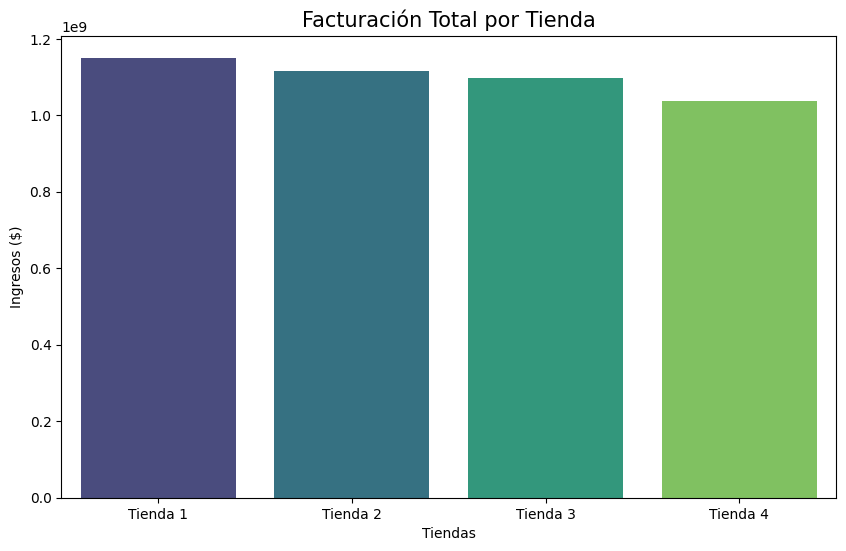

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=nombres, y=facturaciones, palette="viridis")
plt.title("Facturación Total por Tienda", fontsize=15)
plt.ylabel("Ingresos ($)")
plt.xlabel("Tiendas")
plt.show()

Si una tienda está muy por debajo de las demás en facturación, es la candidata #1 para la venta.

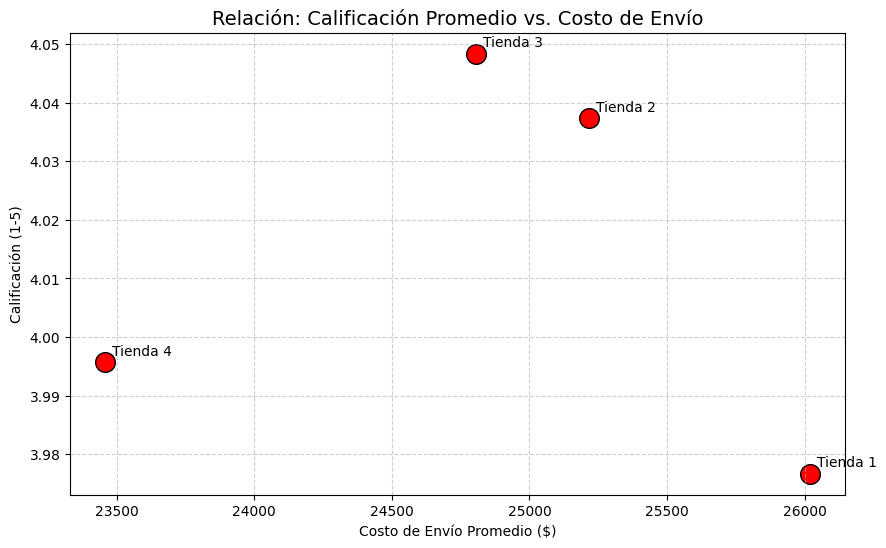

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(envios_promedio, calificaciones, s=200, color='red', edgecolor='black')

# Anotamos los nombres de las tiendas en los puntos
for i, txt in enumerate(nombres):
    plt.annotate(txt, (envios_promedio[i], calificaciones[i]), xytext=(5,5), textcoords='offset points')

plt.title("Relación: Calificación Promedio vs. Costo de Envío", fontsize=14)
plt.xlabel("Costo de Envío Promedio ($)")
plt.ylabel("Calificación (1-5)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Mira la esquina superior izquierda (barato y bueno). Si una tienda aparece en la esquina inferior derecha (caro y malo), es un negocio ineficiente.

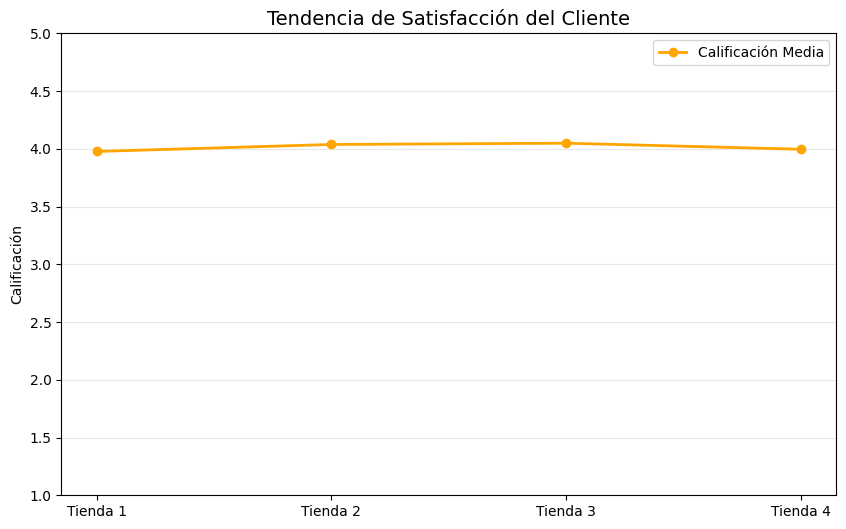

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(nombres, calificaciones, marker='o', linewidth=2, label="Calificación Media", color="orange")
plt.title("Tendencia de Satisfacción del Cliente", fontsize=14)
plt.ylabel("Calificación")
plt.ylim(1, 5) # Las notas son del 1 al 5
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

#📑 Informe Estratégico de Desempeño: Red de Tiendas AluraStore

El propósito de este análisis fue evaluar el desempeño operativo y financiero de las cuatro tiendas del Sr. Juan para determinar cuál de ellas presenta los indicadores de rentabilidad y satisfacción más bajos, facilitando así una decisión estratégica de desinversión. A través del procesamiento de los datos de ventas, logística y opinión del cliente, se buscó identificar la unidad de negocio que, a pesar de sus esfuerzos operativos, no logra alinearse con el éxito financiero de las demás.

Al examinar los ingresos, se observa una brecha clara entre las unidades. La Tienda 1 lidera la generación de valor con una facturación superior a los 1,150  millones de pesos, mientras  que  la Tienda 4 se sitúa en el extremo opuesto, siendo la única que apenas supera la barrera de los 1,038 millones. Esta diferencia de más de $112 millones respecto a la tienda líder es un indicador crítico de un menor volumen de negocio o de una oferta de productos con menor margen de contribución.

En cuanto a la dinámica de productos, todas las tiendas comparten una estructura similar donde los Muebles y Electrónicos son las categorías más populares. Sin embargo, la Tienda 4 presenta una contradicción analítica: aunque registra un volumen alto de unidades vendidas en estas categorías, su facturación total no escala proporcionalmente. Esto sugiere que el inventario de la Tienda 4 (donde destacan las "Camas box" como lo más vendido) tiene un valor unitario o un margen de ganancia inferior al de productos como los "Microondas" de la Tienda 1 o los cursos de programación de la Tienda 2.

Desde la perspectiva del cliente y la logística, la Tienda 4 es la más eficiente en costos de envío, con un promedio de $23,459. No obstante, esta eficiencia no se traduce en una ventaja competitiva real, ya que su calificación promedio (4.00) es superada por la Tienda 2 (4.04) y la Tienda 3 (4.05). Esto demuestra que, aunque el envío es más económico, la experiencia de compra general o la calidad de los productos no destaca frente a la competencia interna.

Basado en la evidencia presentada, se recomienda al Sr. Juan proceder con la venta de la Tienda 4. La justificación reside en que, a pesar de tener los costos logísticos más bajos, es la unidad con la menor capacidad de facturación y un rendimiento estancado en comparación con sus pares. Al desprenderse de esta tienda, el Sr. Juan podrá reinvertir el capital en un nuevo mercado donde el retorno de inversión no se vea limitado por un techo de ingresos tan bajo como el que demuestra actualmente esta sucursal.

#Visualización Geoespacial con Scatter Plot (Matplotlib)


/tmp/ipython-input-866407879.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


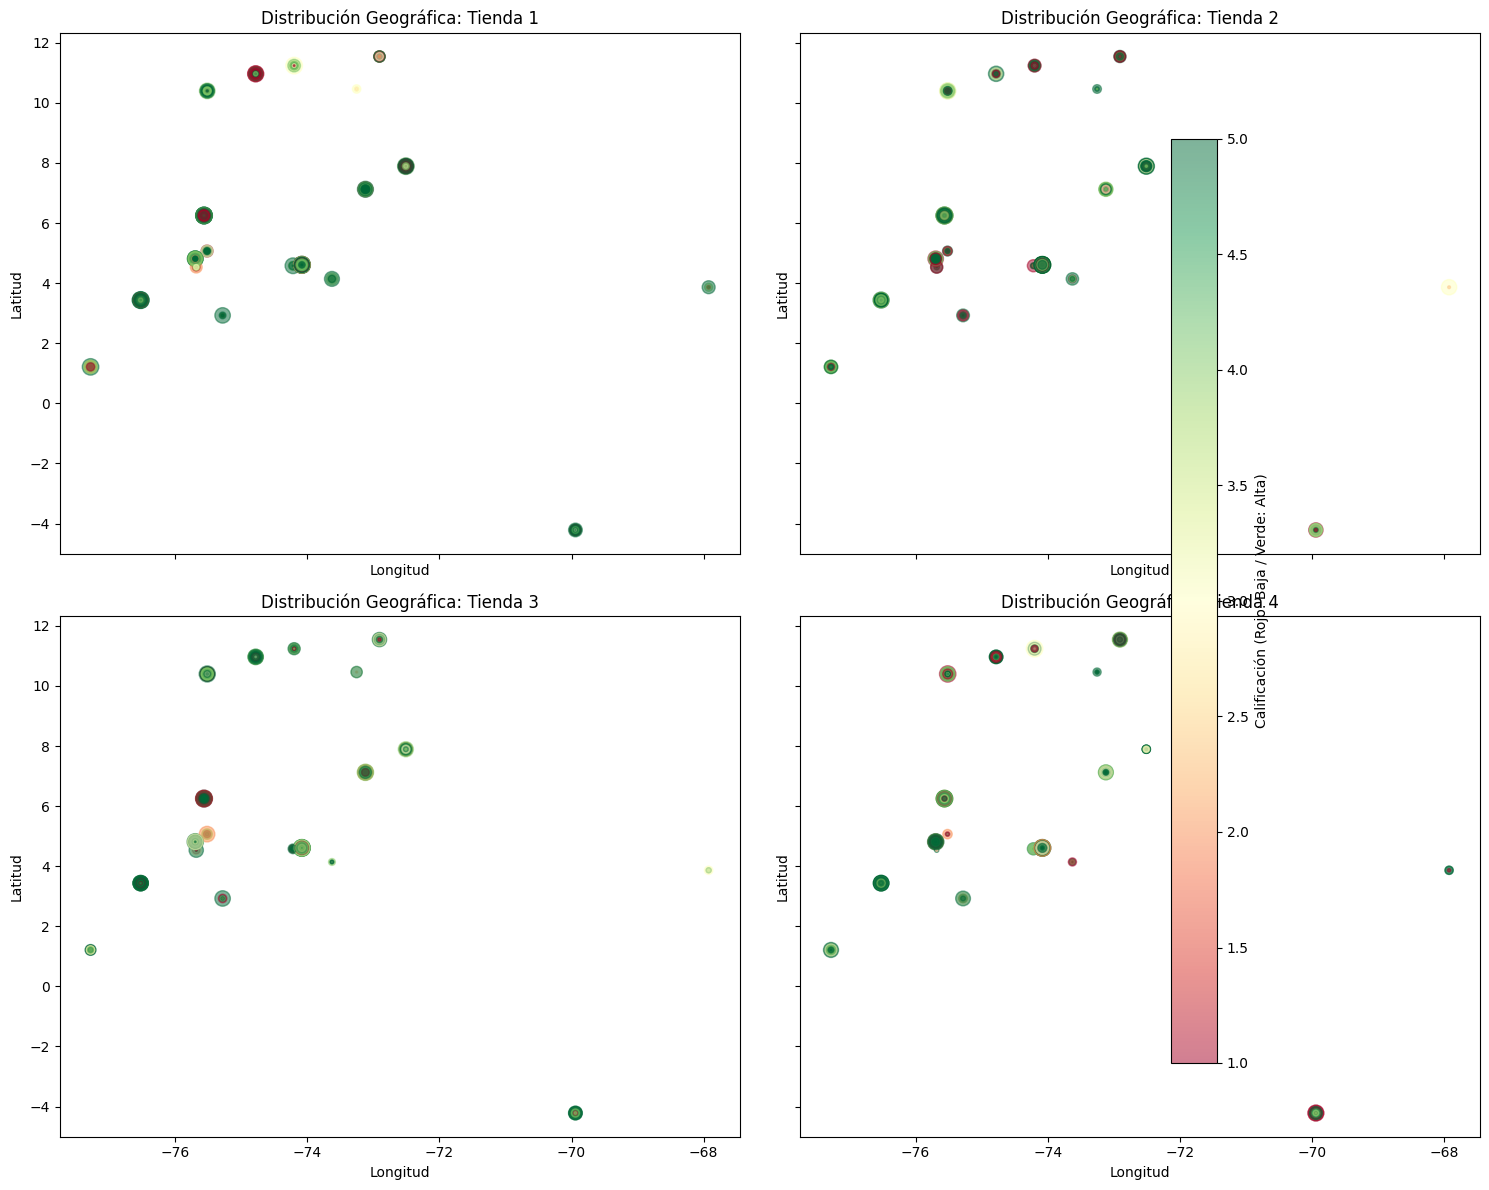

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, df in enumerate(todas_las_tiendas):
    # Graficamos la ubicación de las ventas
    scatter = axes[i].scatter(df['lon'], df['lat'],
                               c=df['Calificación'],
                               s=df['Precio']/20000, # El tamaño depende del precio
                               cmap='RdYlGn', alpha=0.5)
    axes[i].set_title(f"Distribución Geográfica: {nombres[i]}")
    axes[i].set_xlabel("Longitud")
    axes[i].set_ylabel("Latitud")

plt.colorbar(scatter, ax=axes, label='Calificación (Rojo: Baja / Verde: Alta)')
plt.tight_layout()
plt.show()